#### Obravnava problema nihanja s 2 PS ($x_1(t)$ in $x_2(t)$) ob vzbujanju $y(t)$ in uporabo konvolucijskega integrala

In [68]:
! pip install ipynb --upgrade


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\marko\AppData\Local\Programs\Python\Python311-32\python.exe -m pip install --upgrade pip


In [69]:
#import numpy and matplotlib
import numpy as np;
import matplotlib.pyplot as plt;
# import funkcije1.ipynb as f;

#use plot style seaborn
plt.style.use('seaborn');
colors = np.array(['#390099', '#9e0059', '#ff0054', '#ff5400', '#ffbd00', '#80ff72', '#00d084', '#00a3af']);


C:\Users\marko\AppData\Local\Temp\ipykernel_2644\1859771048.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn');


<img src="shema.jpg" width="400">

##### Neodvisna spremenljivka $t$ in podatki - lastnosti sistema

In [70]:
ele = 40000;
t = np.linspace(0, ele/1000, ele + 1)
g = 9.81;

m1 = 10 + 30;
d1 = 0;
k1 = 5000;

m2 = 350;
d2 = 0;
k2 = 700;

#create matrices M and K of zeroes and add values
M = np.zeros((2,2))
K = np.zeros((2,2))
M[0,0] = m1
M[1,1] = m2
K[0,0] = k1
K[0,1] = -k1
K[1,0] = -k1
K[1,1] = k1+k2

M = np.array([[m1, 0], [0, m2]])
K = np.array([[k1+k2, -k2], [-k2, k2]])


#print matrices M and K
print('M = ')
print(M)
print('K = ')
print(K)

M = 
[[ 40   0]
 [  0 350]]
K = 
[[5700 -700]
 [-700  700]]


#### LAstne vrednosti, lastni vektorji

In [71]:
A = np.linalg.inv(M) @ K

#eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvaues = np.sqrt(eigenvalues)
print("eigenvalues")
print(eigenvalues)
print(" ")
print("eigenvectors")
print(eigenvectors)
print(" ")
eigenvectors2 = eigenvectors / eigenvectors[0,:]
print(f'normalized eigenvectors: \n {eigenvectors2}')
print(" ")
print("A")
print(A)

eigenvalues
[142.7486702   1.7513298]
 
eigenvectors
[[ 0.99989906  0.12338504]
 [-0.01420829  0.99235887]]
 
normalized eigenvectors: 
 [[ 1.          1.        ]
 [-0.01420973  8.04278115]]
 
A
[[142.5 -17.5]
 [ -2.    2. ]]


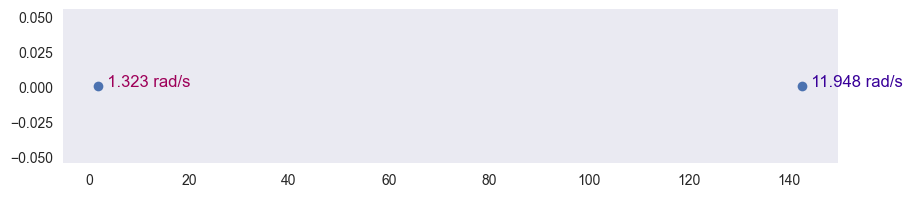

omega1 	 = 1.323 rad/s
omega2 	 = 11.948 rad/s


In [72]:
plt.figure(figsize=(10,2))
plt.grid()
plt.plot(eigenvalues.real, eigenvalues.imag, 'o')
#shoe values as flaot with 2 decimal places
for i in range(len(eigenvalues)):
    plt.text(eigenvalues[i].real, eigenvalues[i].imag, f'  {np.sqrt(eigenvalues[i]):.3f} rad/s ', fontsize=12, color=colors[i])
#plt.axhline(0, color='k', lw=1, alpha=0.2)
plt.show()

omega1 = np.sqrt(eigenvalues[-1])
omega2 = np.sqrt(eigenvalues[-2])

print(f'omega1 \t = {omega1:.3f} rad/s')
print(f'omega2 \t = {omega2:.3f} rad/s')

C:\Users\marko\AppData\Local\Temp\ipykernel_2644\95736991.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


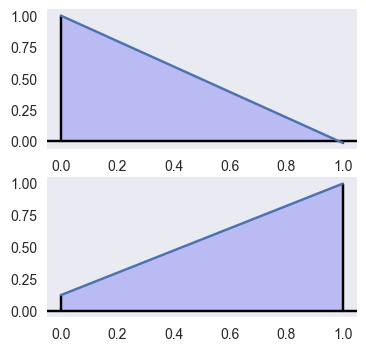

In [73]:
plt.figure(figsize=(4,4))
plt.title("Lastni vektorji")

plt.subplot(2,1,1)
plt.fill_between(np.arange(0,2), eigenvectors[:,0], color='blue', alpha=0.2)
plt.plot([0,0], [0, eigenvectors[0,0]], 'black')
plt.plot([1,1], [0, eigenvectors[1,0]], 'black')
plt.axhline(0, color='black')
plt.axhline(y=0, color='k', lw=0.2)
plt.grid()
plt.plot(eigenvectors[:,0])

plt.subplot(2,1,2)
plt.fill_between(np.arange(0,2), eigenvectors[:,1], color='blue', alpha=0.2)
plt.plot([0,0], [0, eigenvectors[0,1]], 'black')
plt.plot([1,1], [0, eigenvectors[1,1]], 'black')
# plt.ylim(0.95, 1.1)
plt.axhline(y=0, color='k')
plt.grid()
plt.plot(eigenvectors[:,1])



In [74]:
modal_mass2 = eigenvectors[:,0].T @ M @ eigenvectors[:,0]
modal_mass1 = eigenvectors[:,1].T @ M @ eigenvectors[:,1]

modal_stiffness2 = eigenvectors[:,0].T @ K @ eigenvectors[:,0]
modal_stiffness1 = eigenvectors[:,1].T @ K @ eigenvectors[:,1]

print(f'M1  = {modal_mass1:.3f} kg')
print(f'M2  = {modal_mass2:.3f} kg')
print(" ")
print(f'K1  = {modal_stiffness1:.3f} N/m')
print(f'K2  = {modal_stiffness2:.3f} N/m')

M1  = 345.281 kg
M2  = 40.063 kg
 
K1  = 604.700 N/m
K2  = 5718.880 N/m


In [75]:
modal_mass_matrix = np.zeros((2,2))

for i in range(2):
    modal_mass_matrix[i,i] = eigenvectors[:,i].T @ M @ eigenvectors[:,i]
print("Modal mass matrix: ")
print(modal_mass_matrix)

Modal mass matrix: 
[[ 40.06258142   0.        ]
 [  0.         345.28060091]]


In [76]:
modal_stiffness_matrix = np.zeros((2,2))

for i in range(2):
    modal_stiffness_matrix[i,i] = eigenvectors[:,i].T @ K @ eigenvectors[:,i]
print("Modal stiffness matrix: ")
print(modal_stiffness_matrix)

Modal stiffness matrix: 
[[5718.88022227    0.        ]
 [   0.          604.70020565]]


Preverjanje $\omega_1$ in $\omega_2$

In [77]:
omega11 = np.sqrt(modal_stiffness_matrix[-1,-1]/modal_mass_matrix[-1,-1])
omega22 = np.sqrt(modal_stiffness_matrix[-2,-2]/modal_mass_matrix[-2,-2])

print(f'modal stiffness 1 \t = \t{modal_stiffness_matrix[-1,-1]:.3f} N/m')
print(f'modal mass 1 \t\t = \t{modal_mass_matrix[-1,-1]:.2f} kg')
print(f'omega1 \t\t\t = \t{omega11:.2f} rad/s')
print(" ")
print(f'modal stiffness 2 \t = \t{modal_stiffness_matrix[-2,-2]:.3f}')
print(f'modal mass 2 \t\t = \t{modal_mass_matrix[-2,-2]:.2f}')
print(f'omega2 \t\t\t = \t{omega22:.2f} rad/s')

modal stiffness 1 	 = 	604.700 N/m
modal mass 1 		 = 	345.28 kg
omega1 			 = 	1.32 rad/s
 
modal stiffness 2 	 = 	5718.880
modal mass 2 		 = 	40.06
omega2 			 = 	11.95 rad/s


In [78]:
C = np.zeros((2))
phi = np.zeros((2))

C1 = 0;
C2 = 0;

C[0] = C1;
C[1] = C2;

phi1 = 0 * np.pi/180;
phi2 = 0 * np.pi/180;

phi[0] = phi1;
phi[1] = phi2;

## Skrito

In [79]:
# x_1 = eigenvectors[0,-1] * C1 * np.cos(omega1 * t - phi1) + eigenvectors[0,-2] * C2 * np.cos(omega2 * t - phi2)
# x_2 = eigenvectors[1, -1] * C1 * np.sin(omega1 * t - phi1) + eigenvectors[1, -2] * C2 * np.sin(omega2 * t - phi2)

In [80]:
# #plot x_1, x_2 and x_3 verticaly on three plots
# plt.figure(figsize=(8,8))
# #range axis 
# plt.subplot(2,1,1)
# plt.xlim(0, 5)
# plt.plot(t, x_1)
# plt.grid()
# plt.subplot(2,1,2)
# plt.xlim(0, 5)
# plt.plot(t, x_2)
# plt.grid()

In [81]:
# plt.figure(figsize=(8,8))
# #range axis
# plt.subplot(3,2,1)
# plt.xlim(0, 10)
# plt.plot(t, x_1)
# plt.grid()
# plt.subplot(3,2,2)
# plt.xlim(0, 3)
# plt.plot(t, x_1, color='red')
# plt.grid()  
# plt.subplot(3,2,3)
# plt.xlim(0, 10)
# plt.plot(t, x_2)
# plt.grid()
# plt.subplot(3,2,4)
# plt.xlim(0, 3)
# plt.plot(t, x_2, color='red')
# plt.grid()


In [82]:
# #plot x_1, x_2 ond the same plot but with different colors
# plt.figure(figsize=(8,8))
# plt.xlim(0, 10)
# plt.plot(t, x_1, color='blue')
# plt.plot(t, x_2 + 3, color='maroon')


## Definicija vzbujanja

(-0.1, 0.3)

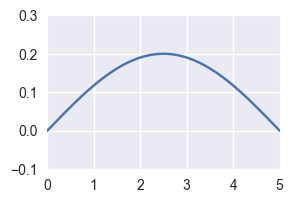

In [83]:
y = 0.2 * np.sin(2 * np.pi * 0.1 * t)
plt.figure(figsize=(3,2))
plt.plot(t, y)
plt.xlim(0, 5)
plt.ylim(-0.1, 0.3)

In [84]:
t[1250]

1.25

t0 = 4.00 s


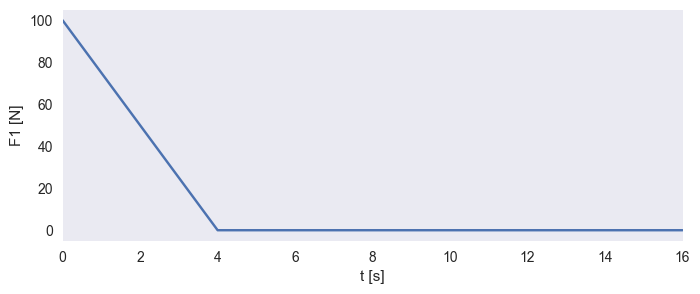

In [85]:
t0 = t[4000]
t0_i = np.argmin(np.abs(t - t0))

print(f't0 = {t0:.2f} s')
F = np.zeros_like(t)
F0 = 100; #N

#F1
F1 = F;
F1[0:t0_i] = F0 * (1 - t[:t0_i]/t0)


plt.figure(figsize=(8,3))
#range axis
plt.xlim(0, 16)
#axis labels
plt.xlabel('t [s]')
plt.ylabel('F1 [N]')
plt.plot(t, F1)
plt.grid()

In [86]:
#create vector Ft with two rows and add F1 to the first row
Ft = np.zeros((2, len(t)))
Ft[0,:] = F1

In [87]:
print("eigenvectors: ")
print(eigenvectors)
print(" ")
print("eigenvectors.T: ")
print(eigenvectors.T)

eigenvectors: 
[[ 0.99989906  0.12338504]
 [-0.01420829  0.99235887]]
 
eigenvectors.T: 
[[ 0.99989906 -0.01420829]
 [ 0.12338504  0.99235887]]


In [88]:
Ft[:, :5]

array([[100.   ,  99.975,  99.95 ,  99.925,  99.9  ],
       [  0.   ,   0.   ,   0.   ,   0.   ,   0.   ]])

In [89]:
Modal_Ft = eigenvectors.T @ Ft
Modal_Ft[:, :5]

array([[99.98990571, 99.96490824, 99.93991076, 99.91491328, 99.88991581],
       [12.33850398, 12.33541935, 12.33233472, 12.3292501 , 12.32616547]])

In [90]:
# d_krit1 = np.sqrt(k1/m1)
delta1 = 0.15;
delta2 = 0.05;

## Konvolucija 1

In [91]:
omega1D = omega1 * np.sqrt(1 - delta1**2)
omega2D = omega2 * np.sqrt(1 - delta2**2)
print(f'omega1 = {omega1:.2f} rad/s')
print(f'omega1D = {omega1D:.2f} rad/s')
print(f'omega2 = {omega2:.2f} rad/s')
print(f'omega2D = {omega2D:.2f} rad/s')

omega1 = 1.32 rad/s
omega1D = 1.31 rad/s
omega2 = 11.95 rad/s
omega2D = 11.93 rad/s


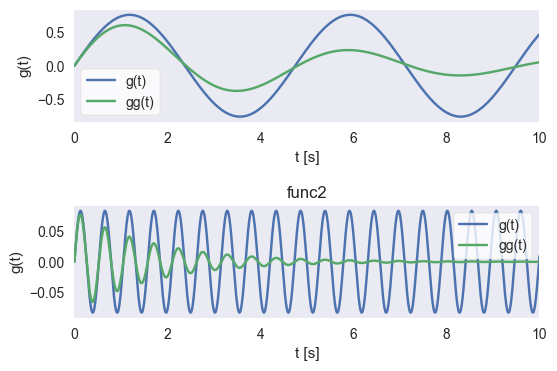

In [92]:
g_func1 = 1/omega1 * np.sin(omega1 * t)
g_func2 = 1/omega2 * np.sin(omega2 * t)

gg_func1 = 1/omega1 * np.exp(-delta1 * omega1 * t) * np.sin(omega1D * t)
gg_func2 = 1/omega2 * np.exp(-delta2 * omega2 * t) * np.sin(omega2D * t)

plot1 = plt.figure(figsize=(6,4))
plt.subplot(2,1,1)
plt.xlim(0, 10)
plt.xlabel('t [s]')
plt.ylabel('g(t)')
plt.plot(t, g_func1)
plt.plot(t, gg_func1) 
plt.grid()
plt.legend(['g(t)', 'gg(t)'], frameon=True, facecolor='white')
plt.subplot(2,1,2)
#add empty space between subplots
plt.subplots_adjust(hspace=0.75)
plt.title("func2")
plt.xlim(0, 10)
plt.xlabel('t [s]')
plt.ylabel('g(t)')
plt.plot(t, g_func2)
plt.plot(t, gg_func2)
plt.grid()
plt.legend(['g(t)', 'gg(t)'], frameon=True, facecolor='white')

### Izračun $\xi_1$ in $\xi_2$ in začetni pogoji

In [93]:
#eta1
eta1 = np.convolve(Modal_Ft[0,:], g_func1) * (t[1] - t[0])
eta1d = np.convolve(Modal_Ft[0,:], gg_func1) * (t[1] - t[0])

#eta2
eta2 = np.convolve(Modal_Ft[1,:], g_func2) * (t[1] - t[0])
eta2d = np.convolve(Modal_Ft[1,:], gg_func2) * (t[1] - t[0])
eta2[:5]
print(f'size of eta2: {eta2.size}')
print(" ")
print(eta1d[100:110])
print(eta2d[100:110])

size of eta2: 80001
 
[0.4878635  0.49749858 0.50722532 0.51704362 0.52695341 0.53695462
 0.54704716 0.55723095 0.56750593 0.577872  ]
[0.05255371 0.05344844 0.05434649 0.05524771 0.05615197 0.05705914
 0.05796907 0.05888164 0.0597967  0.06071412]


In [94]:
#create vector eta with two rows and add eta1 to the first row and eta2 to the second row
eta = np.zeros((2, 2*len(t) - 1))
eta[0,:] = eta1
eta[1,:] = eta2

etaD = np.zeros((2, 2*len(t) - 1))
etaD[0,:] = eta1d
etaD[1,:] = eta2d

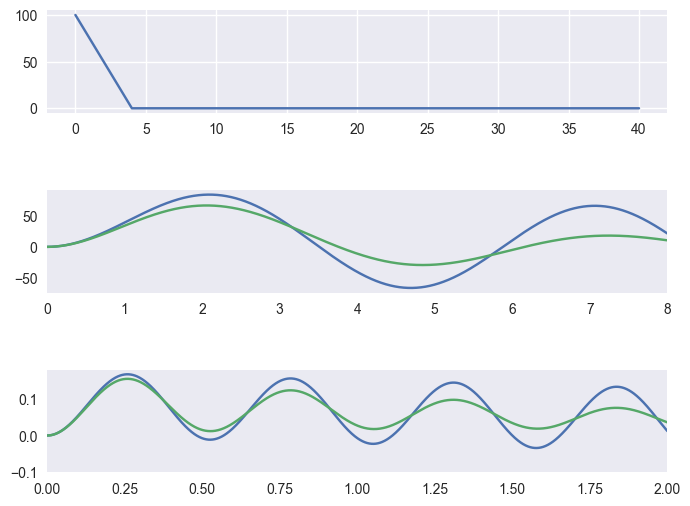

In [102]:
#plot eta1, eta2 
plt.figure(figsize=(8,6))

#range axis
plt.subplot(3,1,1)
plt.plot(t, Ft[0])
plt.subplots_adjust(hspace=0.75)
plt.subplot(3,1,2)
plt.xlim(0, 8)
plt.plot(t, eta1[:ele+1])
plt.plot(t, eta1d[:ele+1])
plt.grid()
plt.subplots_adjust(hspace=0.75)
plt.subplot(3,1,3)
plt.xlim(0, 2)
plt.plot(t, eta2[:ele+1])
plt.plot(t, eta2d[:ele+1])
plt.grid()


### Iz modalnega prostora nazaj v realnega

In [96]:
print(eigenvectors)
print("  ")
print(eta[:,50:60])
print("  ")
print(etaD[:,50:60])

[[ 0.99989906  0.12338504]
 [-0.01420829  0.99235887]]
  
[[0.12691923 0.13198299 0.13714523 0.14240591 0.14776502 0.1532225
  0.15877834 0.16443248 0.1701849  0.17603556]
 [0.01519704 0.01578426 0.01638142 0.01698841 0.01760515 0.01823155
  0.01886752 0.01951296 0.02016778 0.02083187]]
  
[[0.12464803 0.12960404 0.13465543 0.13980214 0.1450441  0.15038122
  0.15581344 0.16134068 0.16696288 0.17267996]
 [0.01487885 0.01544779 0.01602601 0.01661341 0.01720989 0.01781535
  0.01842969 0.01905281 0.01968461 0.02032498]]


In [97]:
eigenvectors[:,1]

array([0.12338504, 0.99235887])

<Figure size 600x400 with 0 Axes>

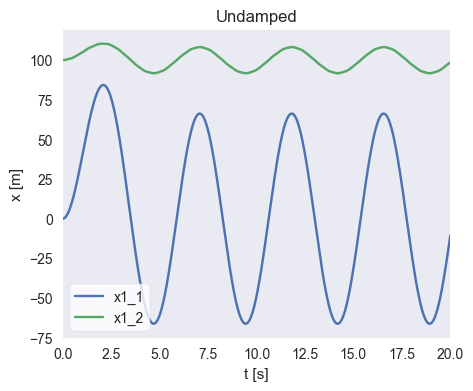

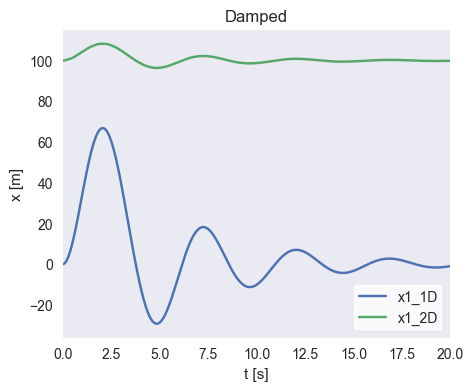

<Figure size 600x400 with 0 Axes>

In [103]:
v_pom = 100
x1_1 = eigenvectors[:,0] @ eta
x1_2 = eigenvectors[:,1] @ eta

x1_1D = eigenvectors[:,0] @ etaD
x1_2D = eigenvectors[:,1] @ etaD

#plot x1_1 and x1_2
plt.figure(figsize=(5,4))
plt.title("Undamped")
plt.xlim(0, 20)
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.plot(t, x1_1[:len(t)])
plt.plot(t, v_pom + x1_2[:len(t)])
plt.grid()
plt.legend(['x1_1', 'x1_2'], frameon=True, facecolor='white')

#plot x1_1D and x1_2D
plt.figure(figsize=(5,4))
plt.title("Damped")
plt.xlim(0, 20)
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.plot(t, x1_1D[:len(t)])
plt.plot(t, v_pom + x1_2D[:len(t)])
plt.grid()
plt.legend(['x1_1D', 'x1_2D'], frameon=True, facecolor='white')

#plot eta1, eta2 
plt.figure(figsize=(6,4))

#range axis
# plt.subplot(3,1,1)
# plt.plot(t, Ft[0])
# plt.subplot(3,1,2)
# plt.xlim(0, 10)
# plt.subplots_adjust(hspace=0.75)
# plt.plot(t, eta1[:ele+1])
# plt.plot(t, eta12[:ele+1])
# plt.grid()
# plt.subplots_adjust(hspace=0.75)
# plt.subplot(3,1,3)
# plt.xlim(0, 1)
# plt.plot(t, eta2[:ele+1])
# plt.plot(t, eta22[:ele+1])
# plt.grid()


## Konec vzbujanje 1

In [99]:
print(f'omega1D = {omega1D:.2f} rad/s')
print(f'omega2D = {omega2D:.2f} rad/s')

omega1D = 1.31 rad/s
omega2D = 11.93 rad/s


In [100]:
#Ft2[0][2000:2005]
print("Modal_Ft2 [0]: ")
print(Modal_Ft2[0][2000:2005])
print(" ")
print("Modal_Ft2 [1]: ")
print(Modal_Ft2[1][2000:2005])
#plt.plot(t, Ft2[0])

Modal_Ft2 [0]: 


NameError: name 'Modal_Ft2' is not defined

In [ ]:
#eta1
eta2_1 = np.convolve(Modal_Ft2[0,:], g_func1) * (t[1] - t[0])
eta2_12 = np.convolve(Modal_Ft2[0,:], gg_func1) * (t[1] - t[0])

#eta2
eta2_2 = np.convolve(Modal_Ft2[1,:], g_func2) * (t[1] - t[0])
eta2_22 = np.convolve(Modal_Ft2[1,:], gg_func2) * (t[1] - t[0])
eta2[:5]


array([0.00000000e+00, 6.49562070e-06, 1.90211245e-05, 3.66814446e-05,
       5.82159141e-05])

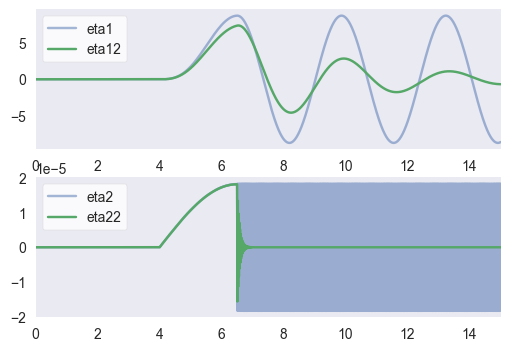

In [ ]:
#plot eta1, eta2 
plt.figure(figsize=(6,4))
#range axis
plt.subplot(2,1,1)
plt.xlim(0, 15)
plt.plot(t, eta2_1[:ele+1], alpha=0.5)
plt.plot(t, eta2_12[:ele+1])
plt.grid()
plt.legend(['eta1', 'eta12'], frameon=True, facecolor='white')


plt.subplot(2,1,2)
plt.xlim(0, 15)
plt.plot(t, eta2_2[:ele+1], alpha=0.5)
plt.plot(t, eta2_22[:ele+1])
plt.legend(['eta2', 'eta22'], frameon=True, facecolor='white')
plt.grid()

In [ ]:
#create vector eta with two rows and add eta1 to the first row and eta2 to the second row
eta2_2 = np.zeros((2, 2*len(t) - 1))
eta2_2[0,:] = eta1
eta2_2[1,:] = eta2

etaD2 = np.zeros((2, 2*len(t) - 1))
etaD2[0,:] = eta12
etaD2[1,:] = eta22

In [ ]:
v_pom = 50
x2_1 = eigenvectors[:,0] @ eta_2
x2_2 = eigenvectors[:,1] @ eta_2

x12_1D = eigenvectors[:,0] @ etaD2
x2_2D = eigenvectors[:,1] @ etaD2



#plot x1_1 and x1_2
plt.figure(figsize=(5,4))
plt.title("Undamped")
plt.xlim(0, 20)
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.plot(t, x2_1[:len(t)])
plt.plot(t, v_pom + x2_2[:len(t)])
plt.grid()
plt.legend(['x1_1', 'x1_2'], frameon=True, facecolor='white')

#plot x2_1D and x2_2D
plt.figure(figsize=(5,4))
plt.title("Damped")
plt.xlim(0, 20)
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.plot(t, x2_1D[:len(t)])
plt.plot(t, v_pom + x2_2D[:len(t)])
plt.grid()
plt.legend(['x1_1D', 'x1_2D'], frameon=True, facecolor='white')

#plot eta1, eta2 
plt.figure(figsize=(6,4))

#range axis
plt.subplot(3,1,1)
plt.plot(t, Ft2[0])
plt.subplot(3,1,2)
plt.xlim(0, 15)
plt.plot(t, eta2_1[:ele+1])
plt.plot(t, eta2_12[:ele+1])
plt.grid()
plt.subplot(3,1,3)
plt.xlim(0, 15)
plt.plot(t, eta2_2[:ele+1])
plt.plot(t, eta2_22[:ele+1])
plt.grid()


NameError: name 'eta_2' is not defined